# Pipeline et estimateur composite 
combinaison d'un transformer et d'un estimateur



## Option 1 : transformer puis estimateur 

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

from sklearn.datasets import load_iris
iris = load_iris()
x= iris.data
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y, test_size =0.2, random_state = 5)

#Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

#estimator
model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

#test

X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

## Option 2 : pipeline
simple, evite fuite de données et permet cross validation

In [12]:
from sklearn.pipeline import make_pipeline

#dans le pipeline on applique le transformer #StandardScaler 
#puis l'estimator SGDClassifier (algo de ML)
model = make_pipeline(StandardScaler(), SGDClassifier() )

model.fit(X_train, y_train) 
model.predict(X_test)

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2])

# Utilisation de GridSearch sur Pipeline

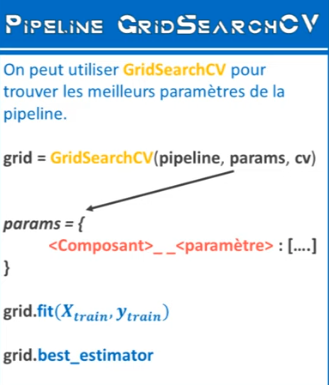

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV

#2x transformers puis 1 estimator
model = make_pipeline(PolynomialFeatures(),
                      StandardScaler(),
                      SGDClassifier(random_state=0))

#mettre "model" puis executer permet de voir les paramètre du model

print(model)

params = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'sgdclassifier__penalty' : ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)
grid.fit(X_train, y_train)


print(grid.best_estimator_)

print(grid.best_score_)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=0,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('poly

## On obtient un résultat fiable à 0.9916666666666667

## sans le preprocessing : 0.7666666666666667

In [32]:
#résultat avant préprocessing :
model = SGDClassifier(random_state=0)
model.fit(X_train, y_train) 
model.score(X_test,y_test)

0.7666666666666667